In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./source/StudentsPerformance.csv')

In [3]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
subjects = ['math score','reading score','writing score']

In [5]:
subjects

['math score', 'reading score', 'writing score']

In [6]:
dataset = df.groupby('gender')[subjects].mean()
dataset

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [7]:
indx = np.arange(len(subjects))
indx

array([0, 1, 2])

In [8]:
score_label = np.arange(0,110,10)
male_means = list(dataset.T['male'])
female_means = list(dataset.T['female'])

In [9]:
dataset.T

gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203


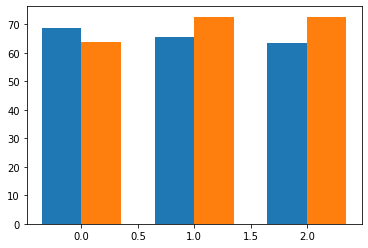

In [10]:
bar_width = .35

fig, ax= plt.subplots()
barMale = ax.bar(indx - bar_width/2, male_means, bar_width, label ='male means')
barFemale = ax.bar(indx+bar_width/2, female_means, bar_width, label = 'female means')
plt.show()

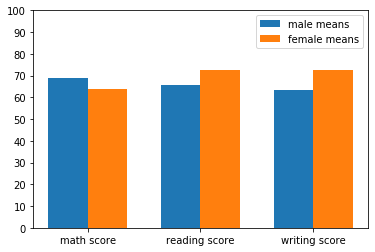

In [11]:
bar_width = .35

fig, ax= plt.subplots()
barMale = ax.bar(indx - bar_width/2, male_means, bar_width, label ='male means')
barFemale = ax.bar(indx+bar_width/2, female_means, bar_width, label = 'female means')

ax.set_xticks(indx)
ax.set_xticklabels(subjects)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()
plt.show()

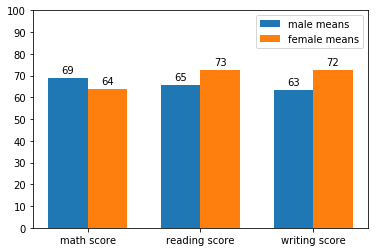

In [12]:
bar_width = .35

fig, ax= plt.subplots()
barMale = ax.bar(indx - bar_width/2, male_means, bar_width, label ='male means')
barFemale = ax.bar(indx+bar_width/2, female_means, bar_width, label = 'female means')

ax.set_xticks(indx)
ax.set_xticklabels(subjects)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()

for i in indx:
    ax.annotate('{0:.0f}'.format(barMale[i].get_height()),
               xy=(barMale[i].get_x() + barMale[i].get_width() / 2, barMale[i].get_height()),
               xytext = (0, 3),
               textcoords = 'offset points',
               ha = 'center',
               va = 'bottom')
    
for i in indx:
    ax.annotate('{0:.0f}'.format(barFemale[i].get_height()),
               xy=(barFemale[i].get_x() + barFemale[i].get_width() / 2, barFemale[i].get_height()),
               xytext = (0, 3),
               textcoords = 'offset points',
               ha = 'center',
               va = 'bottom')
    
plt.show()

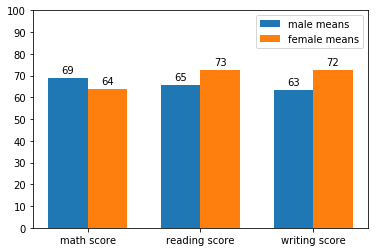

In [13]:
bar_width = .35

fig, ax= plt.subplots()
barMale = ax.bar(indx - bar_width/2, male_means, bar_width, label ='male means')
barFemale = ax.bar(indx+bar_width/2, female_means, bar_width, label = 'female means')

ax.set_xticks(indx)
ax.set_xticklabels(subjects)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()

def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
               xy=(bar.get_x() + bar.get_width() / 2, bar_height),
               xytext = (0, 3),
               textcoords = 'offset points',
               ha = 'center',
               va = 'bottom')
        
insert_data_labels(barMale)
insert_data_labels(barFemale)
plt.show()

In [14]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

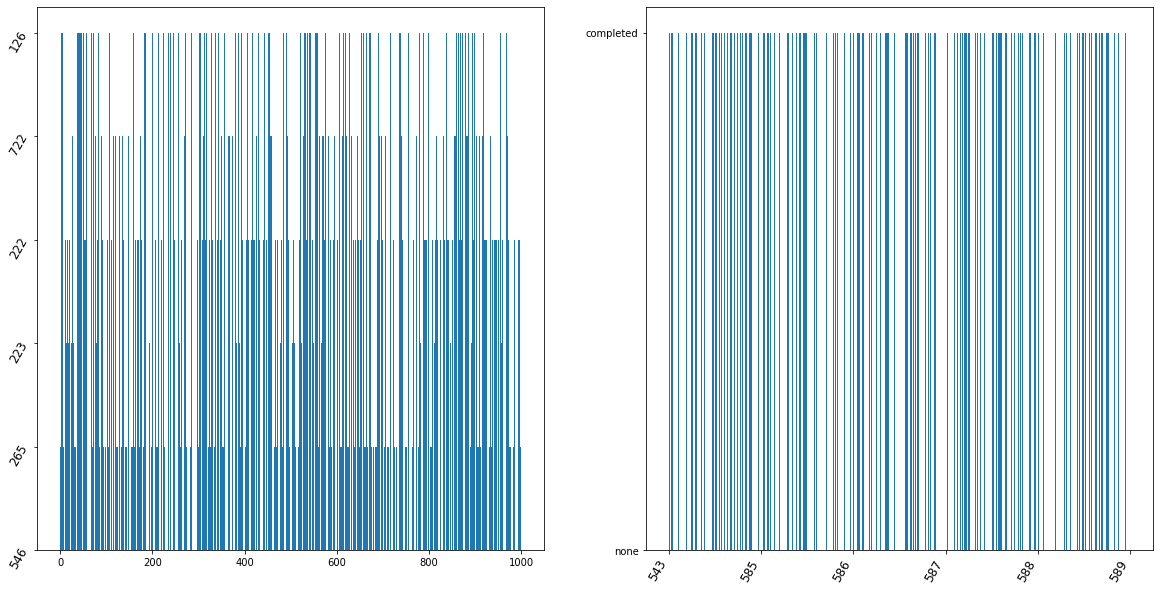

In [15]:
df1 = df.sort_values('parental level of education', ascending=False)
df2 = df.sort_values('test preparation course', ascending=False)

fig = plt.figure(figsize =(20,10))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(df1.index,df1['parental level of education'])
ax1.set_yticklabels(df1.index,rotation =60, horizontalalignment='right',fontsize='12')

ax2.bar(df2.index,df2['test preparation course'])
ax2.set_xticklabels(df2.index,rotation =60, horizontalalignment='right',fontsize='12')

plt.show()

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
tips = sns.load_dataset('tips')

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


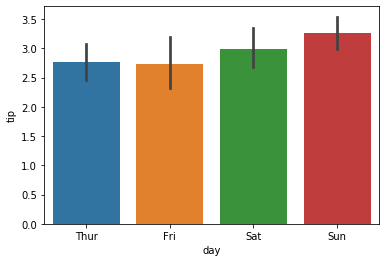

In [19]:
sns.barplot(x='day',y='tip', data=tips)

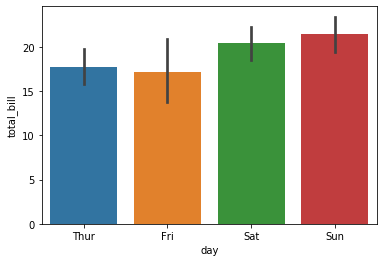

In [20]:
sns.barplot(x='day',y='total_bill', data=tips)

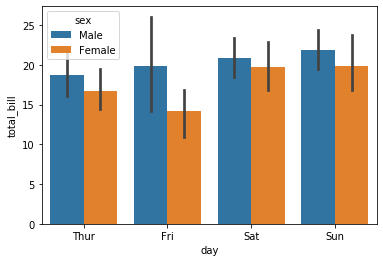

In [21]:
sns.barplot(x='day',y='total_bill', data=tips, hue='sex')

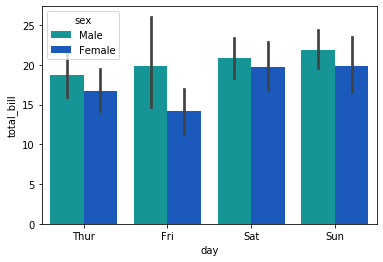

In [22]:
sns.barplot(x='day',y='total_bill', data=tips, hue='sex',palette='winter_r')

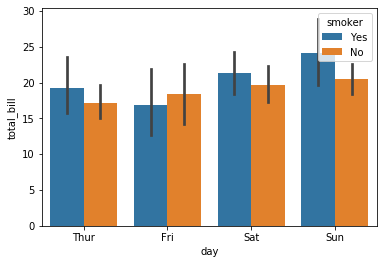

In [23]:
sns.barplot(x='day',y='total_bill', data=tips, hue='smoker')

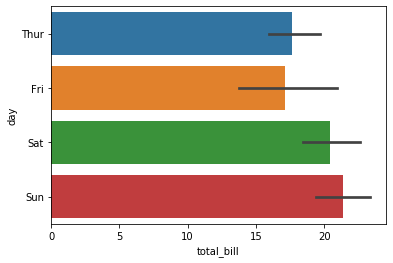

In [24]:
sns.barplot(x='total_bill',y='day', data=tips)

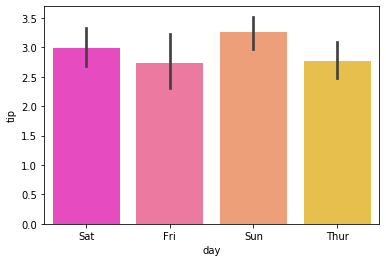

In [25]:
sns.barplot(x='day',y='tip', data=tips, palette='spring',order=['Sat','Fri','Sun','Thur'])

In [28]:
#sns.barplot(x='day',y='total_bill', data=tips, estimator=mean)

In [ ]:
from numpy import median

In [ ]:
sns.barplot(x='smoker',y='tip', data=tips,estimator=median,hue='sex',palette='coolwarm')

In [ ]:
sns.barplot(x='smoker',y='tip', data=tips,ci=2)

In [ ]:
sns.barplot(x='day',y='total_bill', data=tips, capsize=.2)

In [ ]:
sns.barplot(x='size', y='tip', data=tips)